# Lab4 - Training Deep Neural Network
- ณัชชา ศรีสุพันธ์, 59070501020
- หทัยภัทร อินทร์ลับ, 59070501076

Name your file to 59_34xx_34xx.ipynb

## Lab Instruction 

In this lab, you will learn to train a deep fully-connect neural network using Keras library with Tensorflow backend. We will use MNIST data which is a Keras build-in dataset. 

See http://yann.lecun.com/exdb/mnist

**Note:**
Before doing any machine learning/deep learning project, you have to think about the following thing:
1. What is your problem and your data?
- What type of problem do you want to solve? What is your data? What are you trying to predict? Does your data have enough information for your model to predict the expected output?

2. How do you measure your success?
- What do you mean by good model performance? How do you know that your model is ready to be deploy?
- Accuracy? Precision and recall? profit gain? ROC AUC?

3. What is your evaluation method?
- Hold-out method? CV? Iterate CV?

4. How to preprocess your data before fed into a model?

5. What is your baseline? What is a model structure? how does your last layer look like? What is your loss function? What is your optimization function? 

6. Develop a overfit model to figure out how big a model you need by
6.1 Add more layer
6.2 Make layer bigger
6.3 Train more epochs

7. Tune your model to balance the model performance between underfit and overfit (optimization vs generalization)



**Exploding Gradients :**

exploding gradients can result in an unstable network that at best cannot learn from the training data and at worst results in NaN weight values that can no longer be updated.

Ref : : https://machinelearningmastery.com/exploding-gradients-in-neural-networks/?fbclid=IwAR1DOg3pD0RSaxpHMZEEtIqxeCDMsvwkf-OxMb7HL5eK7_qLc4uLNEYcJus



First, import all important library to this project.

In [0]:
import keras
import numpy as np

Using TensorFlow backend.


### 1. Load MNIST data

In [0]:
from keras.datasets import mnist

### Load data ###

#################

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Learn more about the data. For example:
- The distribution of a target class. 
- The characteristic of the input data. How does it looklike? 
- etc.

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_labels.shape

(60000,)

In [0]:
test_labels.shape

(10000,)

In [0]:
test_images.shape

(10000, 28, 28)

### 2. Preprocess a data

In [0]:
train_images = train_images.reshape(60000,28*28) # Reshape
train_images = train_images.astype('float32')/255 # Normalize

test_images = test_images.reshape(10000,28*28) # Reshape
test_images = test_images.astype('float32')/255 # Normalize

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 3. Build a model 
Using `Sequential()`, build a five-fully connect layer with 128 neuron each, *elu* as an activation function, and *he_initialier* as a weight initialier function. 
The output is a probability of each target class *softmax* as an activation function. We will use *Adam optimizer* with the *cross-entropy loss function*.

In [0]:
from keras import models
from keras import layers
from keras import initializers

network = models.Sequential()
network.add(layers.Dense(128, activation='elu',input_shape=(28*28,),kernel_initializer='he_normal'))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal'))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal'))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal'))
network.add(layers.Dense(10, activation='softmax'))

# save model
network.save('dnn_model.h5')

In [0]:
network.compile(optimizer= 'adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


### 4. Train the model

We will train a total of 10 epoch and a batch size of 128. 

To prevent an information leak to test set, which casue an overfit, we will split the data to train set, test set, and validation set. Doing so, we will split the training data into 90% train set and 10% validation set.

Since keras `validation_split` argument split the last 10% of data to be validation set, the target class may not be equally distributed in validation set. Thus, we have to use `train_test_split`  from sklearn to split the data into train set and validation set. 

Hint: Use parameter `stratify = y` in `train_test_split()`
See http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [0]:
from sklearn.model_selection import train_test_split

### Split data ###
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images,train_labels,test_size=0.1,stratify = train_labels, random_state=42)

In [0]:
### Fit the model ###
history = network.fit(train_images,train_labels,epochs=10,batch_size=128,validation_data=(valid_images,valid_labels))
#####################

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 59us/step - loss: 0.2716 - acc: 0.9172 - val_loss: 0.1674 - val_acc: 0.9510
Epoch 2/10
54000/54000 [==============================] - 3s 50us/step - loss: 0.1201 - acc: 0.9628 - val_loss: 0.1224 - val_acc: 0.9627
Epoch 3/10
54000/54000 [==============================] - 3s 50us/step - loss: 0.0866 - acc: 0.9732 - val_loss: 0.1121 - val_acc: 0.9665
Epoch 4/10
54000/54000 [==============================] - 3s 49us/step - loss: 0.0661 - acc: 0.9785 - val_loss: 0.1101 - val_acc: 0.9683
Epoch 5/10
54000/54000 [==============================] - 3s 49us/step - loss: 0.0519 - acc: 0.9829 - val_loss: 0.1128 - val_acc: 0.9683
Epoch 6/10
54000/54000 [==============================] - 3s 50us/step - loss: 0.0425 - acc: 0.9859 - val_loss: 0.1112 - val_acc: 0.9718
Epoch 7/10
54000/54000 [===========

### 5. Evalute the model

Think of the metric that you want to evaluate/measure the performance of your model that can answer the following questions:
- The model is overfit or underfit.
- At which epoch/iteration that it converge or the model become overfit.
- How does the model perform on each data class. What is an overall performace of your model?

In [0]:
### Evaluate the model ###

##########################

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s\n' % (test_loss,test_acc))

train_loss, train_acc = network.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s\n' % (train_loss,train_acc))

valid_loss, valid_acc = network.evaluate(valid_images, valid_labels)
print('Valid Loss: %s\nValid Accuracy: %s' % (valid_loss,valid_acc))

10000/10000 [==============================] - 1s 52us/step
Test Loss: 0.10542656123014676
Test Accuracy: 0.9753

54000/54000 [==============================] - 3s 53us/step
Train Loss: 0.021687874732959446
Train Accuracy: 0.9928148148148148

6000/6000 [==============================] - 0s 56us/step
Valid Loss: 0.12092612728336825
Valid Accuracy: 0.974


In [0]:
from sklearn.metrics import classification_report, confusion_matrix

### evaluate your model ###

###########################
pred = network.predict(test_images)

print(confusion_matrix(test_labels.argmax(axis=1), pred.argmax(axis=1)))
print(classification_report(test_labels.argmax(axis=1),pred.argmax(axis=1)))

[[ 958    0    1    1    0    7    9    1    3    0]
 [   0 1129    1    0    0    1    1    1    2    0]
 [   2    3 1003    5    1    0    2   10    5    1]
 [   0    0    2  984    0    2    0    9    7    6]
 [   0    0    4    0  941    1    4    3    0   29]
 [   1    1    0   12    0  865    8    1    3    1]
 [   1    3    2    1    6    6  937    0    2    0]
 [   0    7    4    1    0    1    0 1005    2    8]
 [   2    0    2    3    3    4    1    5  950    4]
 [   5    2    0    3    8    7    0    0    3  981]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.98   

In [0]:
import  matplotlib.pyplot  as plt
%matplotlib inline

In [0]:
# The function argument is a record or history of the model during training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)
    
#     plt.figure(figsize=(9,5))
    plt.plot(epochs, loss, 'c', label='Training loss')
    plt.plot(epochs, val_loss, 'y', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
def plot_acc_fn(history):

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    epochs = range(1, len(acc) + 1)
    
#     plt.figure(figsize=(9,5))
    plt.plot(epochs, acc, 'c', label='Training acc')
    plt.plot(epochs, val_acc, 'y', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

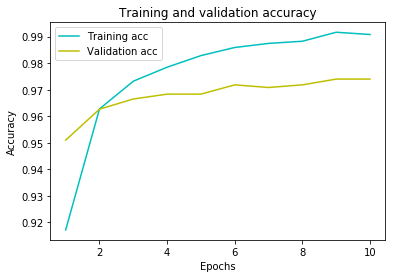

In [0]:
plot_acc_fn(history)

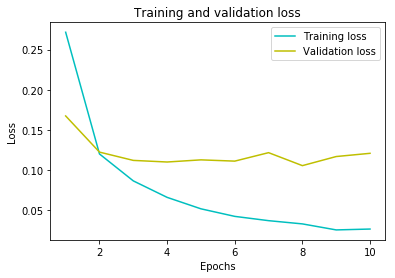

In [0]:
plot_loss_fn(history)

ANS :

### 6. Tune the model 

Try to tune your model by: 
1. Try Increasing epoch and see how it affect your model? Does the result better or it get overfit?
2. Apply an early stop. What is the result do you get? (See https://chrisalbon.com/deep_learning/keras/neural_network_early_stopping/)
4. Try adding regularizer l1 or l2 (or simutaneus l1, l2) to your model. How does it affect your model?
5. Try to add dropout (any dropout rate) with every layer. How does it affect your model? Does it help reduce overfit?

*Discuss the result from these step in the discssion section*

After try above step, **try to achive the highest precision** by tuning the model using what you had aleady learn in the class.
You can try to change the structure of the model by increase or decrease the layer and neuron node in each layer. (Use only fully-connect layer, don't use other type of layer yet!)

You can also try to do a data augmentation.

**The current highest precision of MNIST model is around 99.8%** ( Just try as must as possible, don't worry if you don't achieve this number of precision.)

**Write  down what are you doing and why in each tuning step**

#### Increase Epoch

In [0]:
# Load original model
network = models.load_model('dnn_model.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
network.compile(optimizer= 'adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_epc = network.fit(train_images,train_labels,epochs=50,batch_size=128,validation_data=(valid_images,valid_labels))

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 3s 60us/step - loss: 0.2709 - acc: 0.9161 - val_loss: 0.1582 - val_acc: 0.9548
Epoch 2/50
54000/54000 [==============================] - 3s 52us/step - loss: 0.1218 - acc: 0.9623 - val_loss: 0.1208 - val_acc: 0.9643
Epoch 3/50
54000/54000 [==============================] - 3s 51us/step - loss: 0.0845 - acc: 0.9738 - val_loss: 0.1181 - val_acc: 0.9650
Epoch 4/50
54000/54000 [==============================] - 3s 53us/step - loss: 0.0658 - acc: 0.9792 - val_loss: 0.1009 - val_acc: 0.9733
Epoch 5/50
54000/54000 [==============================] - 3s 52us/step - loss: 0.0516 - acc: 0.9831 - val_loss: 0.0998 - val_acc: 0.9698
Epoch 6/50
54000/54000 [==============================] - 3s 51us/step - loss: 0.0444 - acc: 0.9849 - val_loss: 0.1012 - val_acc: 0.9727
Epoch 7/50
54000/54000 [==============================] - 3s 50us/step - loss: 0.0351 - acc: 0.9880 - val_loss: 0.1169 - val_acc:

In [0]:
train_loss, train_acc = network.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s\n' % (train_loss,train_acc))

valid_loss, valid_acc = network.evaluate(valid_images, valid_labels)
print('Valid Loss: %s\nValid Accuracy: %s' % (valid_loss,valid_acc))

54000/54000 [==============================] - 3s 55us/step
Train Loss: 0.005388687918649234
Train Accuracy: 0.9983888888888889

6000/6000 [==============================] - 0s 63us/step
Valid Loss: 0.14639449417598113
Valid Accuracy: 0.976


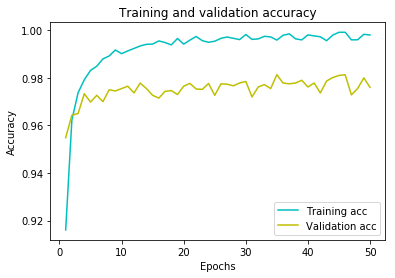

In [0]:
plot_acc_fn(history_epc)

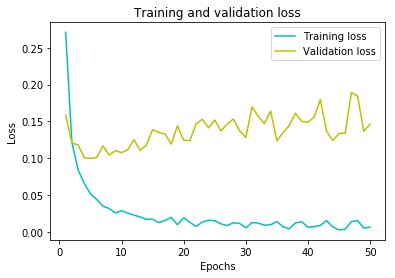

In [0]:
plot_loss_fn(history_epc)

#### Adding Early Stopping

In [0]:
# Load original model
network = models.load_model('dnn_model.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
network.compile(optimizer= 'adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
# Set callback functions to early stop training and save the best model so far
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [0]:
history_early = network.fit(train_images,train_labels,
                          epochs=50,batch_size=128,
                          callbacks=callbacks,
                          validation_data=(valid_images,valid_labels))

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 3s 59us/step - loss: 0.2713 - acc: 0.9173 - val_loss: 0.1566 - val_acc: 0.9532
Epoch 2/50
54000/54000 [==============================] - 3s 50us/step - loss: 0.1207 - acc: 0.9631 - val_loss: 0.1285 - val_acc: 0.9602
Epoch 3/50
54000/54000 [==============================] - 3s 50us/step - loss: 0.0846 - acc: 0.9736 - val_loss: 0.1091 - val_acc: 0.9677
Epoch 4/50
54000/54000 [==============================] - 3s 50us/step - loss: 0.0675 - acc: 0.9781 - val_loss: 0.1059 - val_acc: 0.9683
Epoch 5/50
54000/54000 [==============================] - 3s 50us/step - loss: 0.0530 - acc: 0.9833 - val_loss: 0.1085 - val_acc: 0.9698
Epoch 6/50
54000/54000 [==============================] - 3s 50us/step - loss: 0.0434 - acc: 0.9854 - val_loss: 0.1075 - val_acc: 0.9710


In [0]:
train_loss, train_acc = network.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s\n' % (train_loss,train_acc))

valid_loss, valid_acc = network.evaluate(valid_images, valid_labels)
print('Valid Loss: %s\nValid Accuracy: %s' % (valid_loss,valid_acc))

54000/54000 [==============================] - 3s 55us/step
Train Loss: 0.032584581508094235
Train Accuracy: 0.9895

6000/6000 [==============================] - 0s 54us/step
Valid Loss: 0.10746426475513726
Valid Accuracy: 0.971


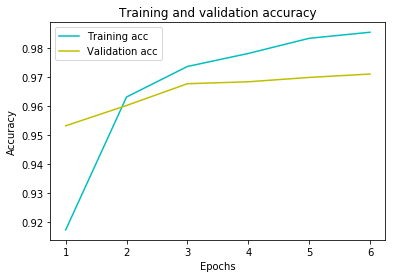

In [0]:
plot_acc_fn(history_early)

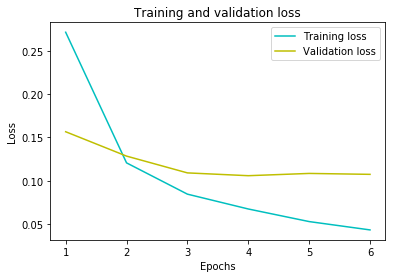

In [0]:
plot_loss_fn(history_early)

#### Adding Regularizer

##### l1 Regularizer

In [0]:
from keras import regularizers

reg = regularizers.l1(0.001)

network = models.Sequential()
network.add(layers.Dense(128, activation='elu',input_shape=(28*28,),kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(10, activation='softmax'))

# save model
network.save('dnn_reg_model.h5')

network.compile(optimizer= 'adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
history_reg = network.fit(train_images,train_labels,
                          epochs=50,batch_size=128,
                          validation_data=(valid_images,valid_labels))

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 3s 65us/step - loss: 6.5875 - acc: 0.6021 - val_loss: 3.6549 - val_acc: 0.5673
Epoch 2/50
54000/54000 [==============================] - 3s 53us/step - loss: 3.1498 - acc: 0.6424 - val_loss: 2.6734 - val_acc: 0.7388
Epoch 3/50
54000/54000 [==============================] - 3s 54us/step - loss: 2.3920 - acc: 0.7937 - val_loss: 2.0849 - val_acc: 0.8323
Epoch 4/50
54000/54000 [==============================] - 3s 54us/step - loss: 1.9132 - acc: 0.8463 - val_loss: 1.7991 - val_acc: 0.8488
Epoch 5/50
54000/54000 [==============================] - 3s 54us/step - loss: 1.6613 - acc: 0.8617 - val_loss: 1.7230 - val_acc: 0.8042
Epoch 6/50
54000/54000 [==============================] - 3s 54us/step - loss: 1.4719 - acc: 0.8713 - val_loss: 1.3852 - val_acc: 0.8710
Epoch 7/50
54000/54000 [==============================] - 3s 54us/step - loss: 1.3273 - acc: 0.8766 - val_loss: 1.2873 - val_acc:

In [0]:
train_loss, train_acc = network.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s\n' % (train_loss,train_acc))

valid_loss, valid_acc = network.evaluate(valid_images, valid_labels)
print('Valid Loss: %s\nValid Accuracy: %s' % (valid_loss,valid_acc))

54000/54000 [==============================] - 3s 62us/step
Train Loss: 0.5529330568401902
Train Accuracy: 0.8750740740740741

6000/6000 [==============================] - 0s 64us/step
Valid Loss: 0.6207611037890116
Valid Accuracy: 0.856


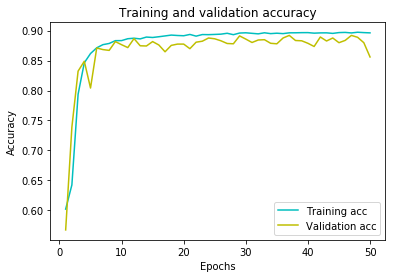

In [0]:
plot_acc_fn(history_reg)

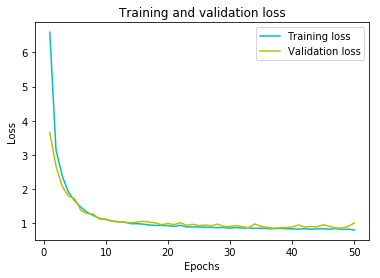

In [0]:
plot_loss_fn(history_reg)

##### l2 Regularizer

In [0]:
reg = regularizers.l2(0.001)

network = models.Sequential()
network.add(layers.Dense(128, activation='elu',input_shape=(28*28,),kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(10, activation='softmax'))

# save model
network.save('dnn_reg_model.h5')

network.compile(optimizer= 'adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
history_reg = network.fit(train_images,train_labels,
                          epochs=50,batch_size=128,
                          validation_data=(valid_images,valid_labels))

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 4s 67us/step - loss: 2.7766 - acc: 0.8036 - val_loss: 1.3262 - val_acc: 0.8683
Epoch 2/50
54000/54000 [==============================] - 3s 54us/step - loss: 1.1021 - acc: 0.8770 - val_loss: 0.9993 - val_acc: 0.8647
Epoch 3/50
54000/54000 [==============================] - 3s 54us/step - loss: 0.8897 - acc: 0.8826 - val_loss: 0.8326 - val_acc: 0.8780
Epoch 4/50
54000/54000 [==============================] - 3s 53us/step - loss: 0.7869 - acc: 0.8884 - val_loss: 0.8111 - val_acc: 0.8647
Epoch 5/50
54000/54000 [==============================] - 3s 54us/step - loss: 0.7158 - acc: 0.8924 - val_loss: 0.7137 - val_acc: 0.8867
Epoch 6/50
54000/54000 [==============================] - 3s 52us/step - loss: 0.6590 - acc: 0.8979 - val_loss: 0.6590 - val_acc: 0.8942
Epoch 7/50
54000/54000 [==============================] - 3s 54us/step - loss: 0.6152 - acc: 0.9015 - val_loss: 0.6413 - val_acc:

In [0]:
train_loss, train_acc = network.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s\n' % (train_loss,train_acc))

valid_loss, valid_acc = network.evaluate(valid_images, valid_labels)
print('Valid Loss: %s\nValid Accuracy: %s' % (valid_loss,valid_acc))

54000/54000 [==============================] - 3s 65us/step
Train Loss: 0.28630293562235654
Train Accuracy: 0.9229074074074074

6000/6000 [==============================] - 0s 64us/step
Valid Loss: 0.38522687125205995
Valid Accuracy: 0.8991666666666667


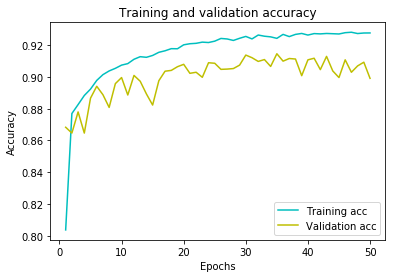

In [0]:
plot_acc_fn(history_reg)

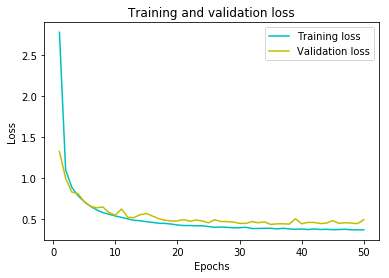

In [0]:
plot_loss_fn(history_reg)

##### l1 & l2 Regularizer l1=0.001, l2=0.001

In [0]:
reg = regularizers.l1_l2(l1=0.001, l2=0.001)

network = models.Sequential()
network.add(layers.Dense(128, activation='elu',input_shape=(28*28,),kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(10, activation='softmax'))

# save model
network.save('dnn_reg_model.h5')

network.compile(optimizer= 'adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
history_reg = network.fit(train_images,train_labels,
                          epochs=50,batch_size=128,
                          validation_data=(valid_images,valid_labels))

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 4s 70us/step - loss: 8.0089 - acc: 0.5067 - val_loss: 3.9992 - val_acc: 0.4858
Epoch 2/50
54000/54000 [==============================] - 3s 56us/step - loss: 3.4452 - acc: 0.4755 - val_loss: 3.0431 - val_acc: 0.5575
Epoch 3/50
54000/54000 [==============================] - 3s 55us/step - loss: 2.6775 - acc: 0.7142 - val_loss: 2.6323 - val_acc: 0.6272
Epoch 4/50
54000/54000 [==============================] - 3s 56us/step - loss: 2.1276 - acc: 0.8106 - val_loss: 1.9305 - val_acc: 0.8302
Epoch 5/50
54000/54000 [==============================] - 3s 57us/step - loss: 1.8016 - acc: 0.8411 - val_loss: 1.6805 - val_acc: 0.8343
Epoch 6/50
54000/54000 [==============================] - 3s 55us/step - loss: 1.5848 - acc: 0.8558 - val_loss: 1.5154 - val_acc: 0.8465
Epoch 7/50
54000/54000 [==============================] - 3s 56us/step - loss: 1.4286 - acc: 0.8643 - val_loss: 1.3540 - val_acc:

In [0]:
train_loss, train_acc = network.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s\n' % (train_loss,train_acc))

valid_loss, valid_acc = network.evaluate(valid_images, valid_labels)
print('Valid Loss: %s\nValid Accuracy: %s' % (valid_loss,valid_acc))

54000/54000 [==============================] - 4s 69us/step
Train Loss: 0.4709994068763874
Train Accuracy: 0.9066296296296297

6000/6000 [==============================] - 0s 68us/step
Valid Loss: 0.5352941032250722
Valid Accuracy: 0.8873333333333333


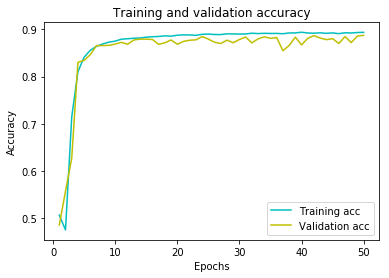

In [0]:
plot_acc_fn(history_reg)

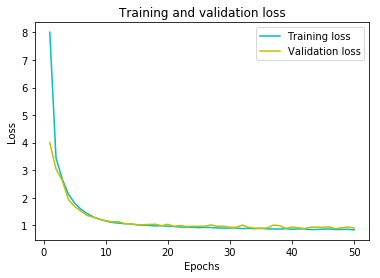

In [0]:
plot_loss_fn(history_reg)

##### l1 & l2 Regularizer l1=0.0001, l2=0.0001

In [0]:
reg = regularizers.l1_l2(l1=0.0001, l2=0.0001)

network = models.Sequential()
network.add(layers.Dense(128, activation='elu',input_shape=(28*28,),kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(10, activation='softmax'))

# save model
network.save('dnn_reg_model.h5')

network.compile(optimizer= 'adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
history_reg = network.fit(train_images,train_labels,
                          epochs=50,batch_size=128,
                          validation_data=(valid_images,valid_labels))

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 4s 73us/step - loss: 1.8505 - acc: 0.8622 - val_loss: 1.2435 - val_acc: 0.8882
Epoch 2/50
54000/54000 [==============================] - 3s 57us/step - loss: 1.0984 - acc: 0.8965 - val_loss: 1.0087 - val_acc: 0.8908
Epoch 3/50
54000/54000 [==============================] - 3s 56us/step - loss: 0.9013 - acc: 0.9097 - val_loss: 0.8602 - val_acc: 0.9033
Epoch 4/50
54000/54000 [==============================] - 3s 57us/step - loss: 0.7972 - acc: 0.9178 - val_loss: 0.8162 - val_acc: 0.9007
Epoch 5/50
54000/54000 [==============================] - 3s 57us/step - loss: 0.7270 - acc: 0.9232 - val_loss: 0.7210 - val_acc: 0.9170
Epoch 6/50
54000/54000 [==============================] - 3s 56us/step - loss: 0.6755 - acc: 0.9262 - val_loss: 0.7122 - val_acc: 0.9148
Epoch 7/50
54000/54000 [==============================] - 3s 57us/step - loss: 0.6338 - acc: 0.9303 - val_loss: 0.6423 - val_acc:

In [0]:
train_loss, train_acc = network.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s\n' % (train_loss,train_acc))

valid_loss, valid_acc = network.evaluate(valid_images, valid_labels)
print('Valid Loss: %s\nValid Accuracy: %s' % (valid_loss,valid_acc))

54000/54000 [==============================] - 4s 69us/step
Train Loss: 0.18773418365805236
Train Accuracy: 0.9599074074074074

6000/6000 [==============================] - 0s 68us/step
Valid Loss: 0.2927913036545118
Valid Accuracy: 0.9338333333333333


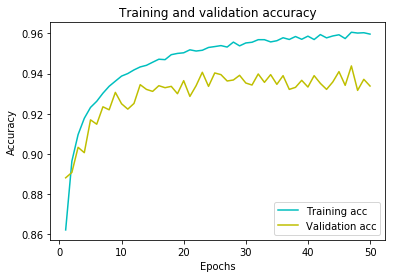

In [0]:
plot_acc_fn(history_reg)

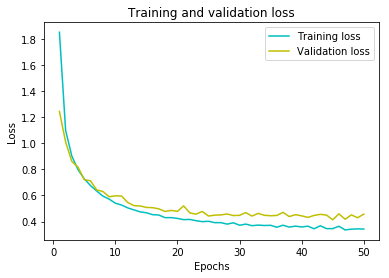

In [0]:
plot_loss_fn(history_reg)

##### l1 & l2 Regularizer l1=0.0001, l2=0.001

In [0]:
reg = regularizers.l1_l2(l1=0.0001, l2=0.001)

network = models.Sequential()
network.add(layers.Dense(128, activation='elu',input_shape=(28*28,),kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(10, activation='softmax'))

# save model
network.save('dnn_reg_model.h5')

network.compile(optimizer= 'adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
history_reg = network.fit(train_images,train_labels,
                          epochs=50,batch_size=128,
                          validation_data=(valid_images,valid_labels))

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 4s 75us/step - loss: 3.4866 - acc: 0.8009 - val_loss: 1.7793 - val_acc: 0.8568
Epoch 2/50
54000/54000 [==============================] - 3s 57us/step - loss: 1.4579 - acc: 0.8704 - val_loss: 1.2885 - val_acc: 0.8692
Epoch 3/50
54000/54000 [==============================] - 3s 58us/step - loss: 1.1699 - acc: 0.8779 - val_loss: 1.1052 - val_acc: 0.8720
Epoch 4/50
54000/54000 [==============================] - 3s 56us/step - loss: 1.0229 - acc: 0.8830 - val_loss: 1.0097 - val_acc: 0.8772
Epoch 5/50
54000/54000 [==============================] - 3s 57us/step - loss: 0.9246 - acc: 0.8889 - val_loss: 0.9099 - val_acc: 0.8880
Epoch 6/50
54000/54000 [==============================] - 3s 57us/step - loss: 0.8577 - acc: 0.8921 - val_loss: 0.8708 - val_acc: 0.8892
Epoch 7/50
54000/54000 [==============================] - 3s 57us/step - loss: 0.8053 - acc: 0.8959 - val_loss: 0.8022 - val_acc:

In [0]:
train_loss, train_acc = network.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s\n' % (train_loss,train_acc))

valid_loss, valid_acc = network.evaluate(valid_images, valid_labels)
print('Valid Loss: %s\nValid Accuracy: %s' % (valid_loss,valid_acc))

54000/54000 [==============================] - 4s 72us/step
Train Loss: 0.31164207825837315
Train Accuracy: 0.9271111111111111

6000/6000 [==============================] - 0s 73us/step
Valid Loss: 0.3951268124580383
Valid Accuracy: 0.9071666666666667


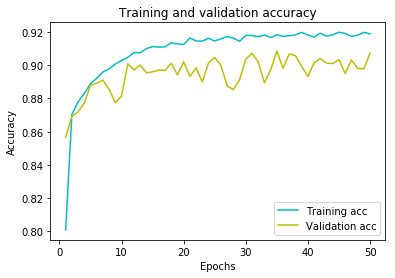

In [0]:
plot_acc_fn(history_reg)

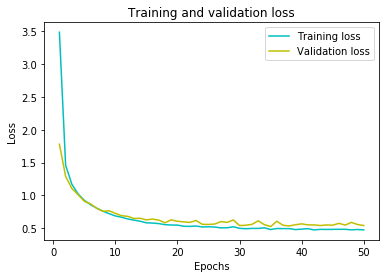

In [0]:
plot_loss_fn(history_reg)

##### l1 & l2 Regularizer l1=0.001, l2=0.0001

In [0]:
reg = regularizers.l1_l2(l1=0.001, l2=0.0001)

network = models.Sequential()
network.add(layers.Dense(128, activation='elu',input_shape=(28*28,),kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal',activity_regularizer=reg))
network.add(layers.Dense(10, activation='softmax'))

# save model
network.save('dnn_reg_model.h5')

network.compile(optimizer= 'adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
history_reg = network.fit(train_images,train_labels,
                          epochs=50,batch_size=128,
                          validation_data=(valid_images,valid_labels))

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 4s 78us/step - loss: 6.8966 - acc: 0.6082 - val_loss: 3.7380 - val_acc: 0.5410
Epoch 2/50
54000/54000 [==============================] - 3s 54us/step - loss: 3.1918 - acc: 0.6253 - val_loss: 2.7687 - val_acc: 0.7498
Epoch 3/50
54000/54000 [==============================] - 3s 57us/step - loss: 2.4312 - acc: 0.7866 - val_loss: 2.2465 - val_acc: 0.7975
Epoch 4/50
54000/54000 [==============================] - 3s 56us/step - loss: 1.9845 - acc: 0.8427 - val_loss: 1.8444 - val_acc: 0.8377
Epoch 5/50
54000/54000 [==============================] - 3s 58us/step - loss: 1.6999 - acc: 0.8628 - val_loss: 1.6084 - val_acc: 0.8635
Epoch 6/50
54000/54000 [==============================] - 3s 57us/step - loss: 1.4950 - acc: 0.8734 - val_loss: 1.4434 - val_acc: 0.8652
Epoch 7/50
54000/54000 [==============================] - 3s 57us/step - loss: 1.3506 - acc: 0.8785 - val_loss: 1.2971 - val_acc:

In [0]:
train_loss, train_acc = network.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s\n' % (train_loss,train_acc))

valid_loss, valid_acc = network.evaluate(valid_images, valid_labels)
print('Valid Loss: %s\nValid Accuracy: %s' % (valid_loss,valid_acc))

54000/54000 [==============================] - 4s 72us/step
Train Loss: 0.45492491836901067
Train Accuracy: 0.9077407407407407

6000/6000 [==============================] - 0s 67us/step
Valid Loss: 0.5234496902624766
Valid Accuracy: 0.8885


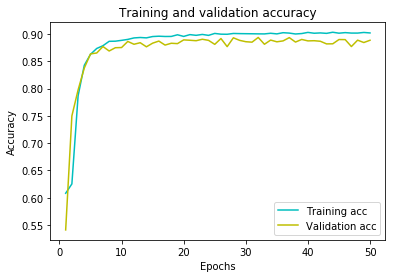

In [0]:
plot_acc_fn(history_reg)

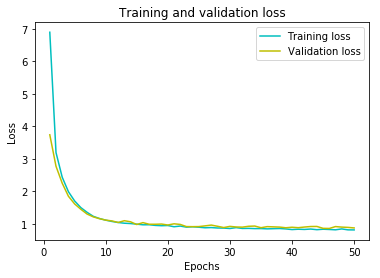

In [0]:
plot_loss_fn(history_reg)

#### Adding dropout (every layer) (0.1)

In [0]:
from keras.layers import Dropout

network = models.Sequential()
network.add(layers.Dense(128, activation='elu',input_shape=(28*28,),kernel_initializer='he_normal'))
network.add(Dropout(0.1))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal'))
network.add(Dropout(0.1))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal'))
network.add(Dropout(0.1))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal'))
network.add(Dropout(0.1))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer= 'adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
history_dropout = network.fit(train_images,train_labels,
                          epochs=50,batch_size=128,
                          validation_data=(valid_images,valid_labels))

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 4s 79us/step - loss: 0.3581 - acc: 0.8878 - val_loss: 0.1828 - val_acc: 0.9455
Epoch 2/50
54000/54000 [==============================] - 3s 57us/step - loss: 0.1826 - acc: 0.9439 - val_loss: 0.1429 - val_acc: 0.9592
Epoch 3/50
54000/54000 [==============================] - 3s 55us/step - loss: 0.1395 - acc: 0.9554 - val_loss: 0.1190 - val_acc: 0.9633
Epoch 4/50
54000/54000 [==============================] - 3s 57us/step - loss: 0.1150 - acc: 0.9636 - val_loss: 0.1035 - val_acc: 0.9677
Epoch 5/50
54000/54000 [==============================] - 3s 57us/step - loss: 0.1010 - acc: 0.9681 - val_loss: 0.1063 - val_acc: 0.9700
Epoch 6/50
54000/54000 [==============================] - 3s 61us/step - loss: 0.0897 - acc: 0.9710 - val_loss: 0.0917 - val_acc: 0.9742
Epoch 7/50
54000/54000 [==============================] - 3s 62us/step - loss: 0.0802 - acc: 0.9746 - val_loss: 0.0876 - val_acc:

In [0]:
train_loss, train_acc = network.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s\n' % (train_loss,train_acc))

valid_loss, valid_acc = network.evaluate(valid_images, valid_labels)
print('Valid Loss: %s\nValid Accuracy: %s' % (valid_loss,valid_acc))

54000/54000 [==============================] - 3s 64us/step
Train Loss: 0.0033328232024607838
Train Accuracy: 0.9988148148148148

6000/6000 [==============================] - 0s 66us/step
Valid Loss: 0.11965415670838381
Valid Accuracy: 0.9815


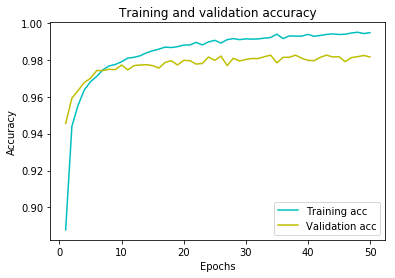

In [0]:
plot_acc_fn(history_dropout)

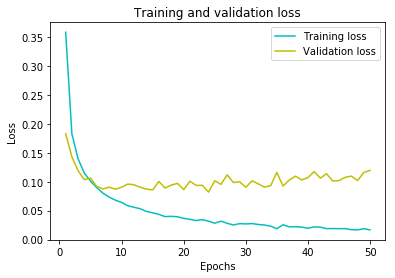

In [0]:
plot_loss_fn(history_dropout)

#### Adding dropout (every layer)(0.2)

In [0]:
from keras.layers import Dropout

network = models.Sequential()
network.add(layers.Dense(128, activation='elu',input_shape=(28*28,),kernel_initializer='he_normal'))
network.add(Dropout(0.2))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal'))
network.add(Dropout(0.2))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal'))
network.add(Dropout(0.2))
network.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal'))
network.add(Dropout(0.2))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer= 'adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
history_dropout = network.fit(train_images,train_labels,
                          epochs=50,batch_size=128,
                          validation_data=(valid_images,valid_labels))

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 5s 83us/step - loss: 0.4581 - acc: 0.8582 - val_loss: 0.2111 - val_acc: 0.9372
Epoch 2/50
54000/54000 [==============================] - 3s 57us/step - loss: 0.2522 - acc: 0.9224 - val_loss: 0.1731 - val_acc: 0.9477
Epoch 3/50
54000/54000 [==============================] - 3s 59us/step - loss: 0.2022 - acc: 0.9382 - val_loss: 0.1392 - val_acc: 0.9562
Epoch 4/50
54000/54000 [==============================] - 3s 57us/step - loss: 0.1747 - acc: 0.9463 - val_loss: 0.1314 - val_acc: 0.9585
Epoch 5/50
54000/54000 [==============================] - 3s 58us/step - loss: 0.1541 - acc: 0.9531 - val_loss: 0.1205 - val_acc: 0.9638
Epoch 6/50
54000/54000 [==============================] - 3s 59us/step - loss: 0.1375 - acc: 0.9572 - val_loss: 0.1106 - val_acc: 0.9660
Epoch 7/50
54000/54000 [==============================] - 3s 58us/step - loss: 0.1281 - acc: 0.9590 - val_loss: 0.1101 - val_acc:

In [0]:
train_loss, train_acc = network.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s\n' % (train_loss,train_acc))

valid_loss, valid_acc = network.evaluate(valid_images, valid_labels)
print('Valid Loss: %s\nValid Accuracy: %s' % (valid_loss,valid_acc))

54000/54000 [==============================] - 3s 65us/step
Train Loss: 0.0050037053014522015
Train Accuracy: 0.9985

6000/6000 [==============================] - 0s 64us/step
Valid Loss: 0.0845715424339287
Valid Accuracy: 0.9808333333333333


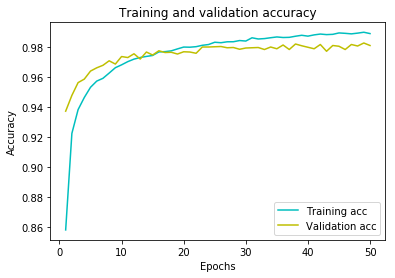

In [0]:
plot_acc_fn(history_dropout)

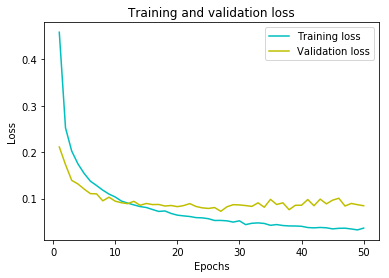

In [0]:
plot_loss_fn(history_dropout)

#### My Tuning

In [0]:
from keras import regularizers
from keras.layers import Dropout

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [0]:
from keras import optimizers
adam = optimizers.Adam(lr=0.001)

In [0]:
model = models.Sequential()
model.add(layers.Dense(512, activation='elu',input_shape=(28*28,),kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(layers.Dense(512, activation='elu',kernel_initializer='he_normal'))
model.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer= 'adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
history_tune = model.fit(train_images,train_labels,
                          epochs=50,batch_size=128,
                          callbacks=callbacks,
                          validation_data=(valid_images,valid_labels))

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 5s 94us/step - loss: 0.2924 - acc: 0.9096 - val_loss: 0.1486 - val_acc: 0.9553
Epoch 2/50
54000/54000 [==============================] - 4s 65us/step - loss: 0.1529 - acc: 0.9519 - val_loss: 0.1375 - val_acc: 0.9580
Epoch 3/50
54000/54000 [==============================] - 3s 64us/step - loss: 0.1167 - acc: 0.9633 - val_loss: 0.1216 - val_acc: 0.9643
Epoch 4/50
54000/54000 [==============================] - 3s 63us/step - loss: 0.1029 - acc: 0.9682 - val_loss: 0.1219 - val_acc: 0.9658
Epoch 5/50
54000/54000 [==============================] - 3s 63us/step - loss: 0.0903 - acc: 0.9711 - val_loss: 0.1025 - val_acc: 0.9722
Epoch 6/50
54000/54000 [==============================] - 3s 65us/step - loss: 0.0801 - acc: 0.9750 - val_loss: 0.0990 - val_acc: 0.9733
Epoch 7/50
54000/54000 [==============================] - 3s 63us/step - loss: 0.0738 - acc: 0.9767 - val_loss: 0.1216 - val_acc:

### 7. Final Evaluation

After you make sure that your model is good enough to be deploy in application, it is a time to evaluate your model with test set in order to test that your model is generalize well and not overfit to validation set.

In [0]:
pred = model.predict(test_images)

print(confusion_matrix(test_labels.argmax(axis=1), pred.argmax(axis=1)))
print(classification_report(test_labels.argmax(axis=1),pred.argmax(axis=1)))

[[ 965    0    3    2    0    2    5    1    1    1]
 [   0 1118    1    2    0    1    2    3    8    0]
 [   1    3 1014    2    1    0    2    7    2    0]
 [   0    0    8  968    0   30    0    3    0    1]
 [   0    0    1    1  963    0    5    1    1   10]
 [   1    0    0    2    0  874    3    1    2    9]
 [   3    3    0    0    4    3  943    0    2    0]
 [   2    2   16    5    0    0    0  999    1    3]
 [   4    1   11   11    2    6    2    7  927    3]
 [   1    2    0    4   11    3    1    7    1  979]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.96      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.95      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97   

In [0]:
train_loss, train_acc = model.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s\n' % (train_loss,train_acc))

valid_loss, valid_acc = model.evaluate(valid_images, valid_labels)
print('Valid Loss: %s\nValid Accuracy: %s' % (valid_loss,valid_acc))

54000/54000 [==============================] - 4s 68us/step
Train Loss: 0.039737436330234806
Train Accuracy: 0.9865

6000/6000 [==============================] - 0s 71us/step
Valid Loss: 0.09917503907085241
Valid Accuracy: 0.9755


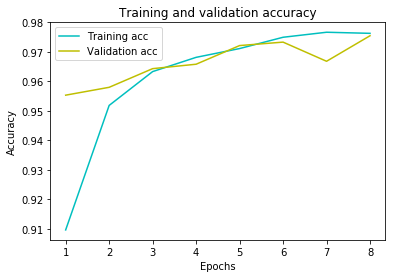

In [0]:
plot_acc_fn(history_tune)

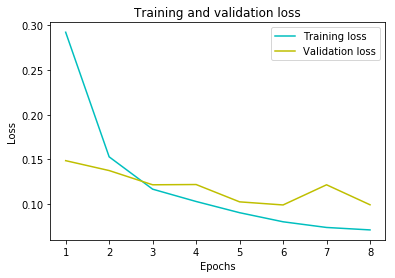

In [0]:
plot_loss_fn(history_tune)

My Tune : ทดลองเพิ่ม dropout(0.2) ไป 2 layer ,จำนวน node คือ 512 และ 128 ,initializer='he_normal' และ optimizer adam ด้วย learning rate = 0.001 และ ทำ early stopping

ผลลัพธ์ : Train acc = 0.9865 | Valid acc = 0.9755 ได้ acc ที่สูง แต่ยังมีความ overfit อยู่

จาก confuxion matrix โมเดลทำนายผิดจาก class 5 เป็น 3 และจาก ค่า precision ของแต่ละ class พบว่าใน class 5 ค่าน้อยสุด

### Result & Discussion 

- Write down the key finding from this lab. Discuss what you had done, what do you get from the output or a result, and why (support your reason)

1. Incease Epoch : 

  เพิ่มจำนวน epoch จาก 30 เป็น 50 epoch เพื่อให้โมเดลเรียนรู้ได้มากขึ้น เพื่อจะได้ลดค่า loss ได้มากขึ้น
  
  ผลลัพธ์ : Train acc = 0.998 | Valid acc = 0.976 โมเดลมี accuracy สูงขึ้นเล็กน้อย จากกราฟโมเดลมีความ overfit ตั้งแต่ประมาณ epoch ที่ 2 เหมือนเดิม ซึ่งถือว่าโมเดลไม่ได้มีประสิทธิภาพเพิ่มขึ้น เพราะการเพิ่ม epoch ช่วยเพิ่มเพียงส่วนการเรียนรู้ของโมเดล
  
2. Adding Early Stopping :

   ทำการเพิ่ม early stopping เพื่อให้โมเดลหยุดเรียนรู้ ณ จุดที่ค่า loss มีแนวโน้มที่จะไม่ลดลงแล้วหลังจากนั้น 2 epoch (patience=2) 
   
   ผลลัพธ์ : Train acc = 0.9895 | Valid acc = 0.971 ถือว่า accuracy ใกล้เคียงกับการเพิ่มจำนวน epoch และจากกราฟโมเดลยังคง overfit อยู่เช่นเดิม เพราะเป็นการตัดปัญหาส่วนที่ Overfit เยอะๆ ทิ้งไป 
   
3. Adding Regularizer :

    ทำการเพิ่ม Regularizer ดังนี้ 
     
    - l1 (0.001) :  Train acc = 0.875 | Valid acc = 0.856 
    
    ซึ่ง acc ต่ำกว่าโมเดลที่ไม่ได้ทำการเพิ่ม reg. แต่จากทั้ง 2 กราฟ(acc และ loss) พบว่า valid. มีแนวโน้มลู่เข้าหา train มากกว่ากราฟของโมเดลที่ไม่ได้ทำการเพิ่ม reg. และถือว่าสามารถลด overfit ลงได้
    
    - l2 (0.001)  : Train acc = 0.922 | Valid acc = 0.899 
    
    ซึ่ง acc เพิ่มขึ้น และจากกราฟอาจจะมีความ overfit กว่าถ้าเทียบกับกราฟของ reg. l1(0.001) ข้างต้น
    
    - l1(0.001) & l2(0.001) : Train acc = 0.906 | Valid acc = 0.887 
    
    จากกราฟสามารถลด overfit จากแบบข้างต้นได้
    - l1(0.0001 & l2(0.0001) : Train acc = 0.959 | Valid acc = 0.933 
    
    จะเห็นได้ว่า acc เพิ่มขึ้น แต่จากทั้ง 2 กราฟ เส้น valid มีแนวโน้มคงที่ตั้งแต่ epoch ที่ 10 และถือว่ายังมีความ overfit อยู่เล็กน้อย
    
    - l1(0.0001) & l2(0.001) : Train acc = 0.927 | Valid acc = 0.907 
    
    จะเห็นว่า acc ต่ำกว่าแบบ l1(0.0001 & l2(0.0001) แต่จากกราฟ loss เส้น valid ในแนวโน้มเข้าหาเส้น train มากกว่า
    
    - l1(0.001) & l2(0.0001) : Train acc = 0.907 | Valid acc = 0.888 
    
    จะเห็นว่า acc ต่ำลง แต่จากทั้ง 2 กราฟ เส้น valid มีแนวโน้มลู่เข้าหาเส้น train มากกว่า
    
  สรุป การเพิ่ม Regularizer สามารถช่วยลด overfit ของโมเดลลงได้ ซึ่งอาจจะทำให้ได้ accuracy ที่ไม่สูงเท่าแบบไม่ได้เพิ่ม Regularizer

4. Adding Dropout :

    - Dropput(0.1) : Train acc = 0.9988 | Valid acc = 0.981
    จากกราฟโมเดล overfit ประมาณ epoch ที่ 7
    - Dropout(0.2) : Train acc = 0.9985 | Valid acc = 0.980
    จากกราฟโมเดล overfit ประมาณ epoch ที่ 15
    
  สรุป การเพิ่ม Dropout สามารถทำให้โมเดลมีค่า acc ที่สูง และช่วยลด overfit ลงได้เล็กน้อย โดยความถูกต้องของโมเดลไม่ลดลงมาก
เมื่อเทียบกับการเพิ่ม Regularizer 

จากแลปนี้พบว่าโมเดลที่มีความถูกต้องสูงนั้น อาจมีความถูกต้องในการทำนายต่ำ หากโมเดลไม่ good fit แต่ในขณะเดียวกันโมเดลที่มีความถูกต้องต่ำลงมากว่าหน่อย แต่โมเดลมีความ good fit จะให้ผลลัพธ์ของการทำนายในแต่ละคลาสค่อนข้างคงที และใกล้เคียงค่าเฉลี่ยมากกว่าหากเทียบจาก Confusion matrix

### 8. Play with your model

1. Use any kind of drawing application ( For example, Paint or Adobe Photoshop ), create a 28x28 pixel (any resolution) with black (#000000) background and white (#FFFFFF) paint. 
2. Draw 3 any distinct single digit number of a range from 0 - 9. Then save the image (PNG)

for local pc :
3. Install open-cv (See https://pypi.org/project/opencv-python) by 
> `pip install opencv-python` <br/> or conda (See https://anaconda.org/conda-forge/opencv)

for colab use:
3. ```import cv2 as cv```
4. Load your image to this IPython using ```imread()``` function
5. Preprocess as what you did during the development stage.
6. Feed your image to your best model.

What class do your model predict? Does it correct? If not, why do it still get negative result since your model get more than 90% accuracy?

In [0]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [0]:
# Read images
img0 = cv.imread('image0.png',0)
img1 = cv.imread('image1.png',0)
img2 = cv.imread('image2.png',0)
img3 = cv.imread('image3.png',0)
img8 = cv.imread('image8.png',0)

In [0]:
# Add images into list
img_list = [img0,img1,img2,img3,img8]

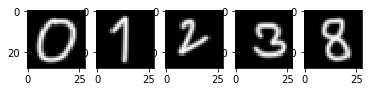

In [0]:
fig, ax = plt.subplots(1, 5)
ax[0].imshow(img_list[0],cmap='gray')
ax[1].imshow(img_list[1],cmap='gray')
ax[2].imshow(img_list[2],cmap='gray')
ax[3].imshow(img_list[3],cmap='gray')
ax[4].imshow(img_list[4],cmap='gray')

# plt.imshow(img_list[1],cmap='gray')
# plt.show()

In [0]:
# Convert list to numpy
img_list = np.array(img_list)

In [0]:
print(type(img_list))
print(img_list.shape)
print(img_list.ndim)

<class 'numpy.ndarray'>
(5, 28, 28)
3


In [0]:
# Reshape and Normalize
data = img_list.reshape(img_list.shape[0],28*28).astype('float32')/255.

In [0]:
data.shape

(5, 784)

In [0]:
# Predict data
pred_img = model.predict(data)

In [0]:
# Print result of prediction
print(pred_img.argmax(axis=1))

[0 1 6 5 8]


ANS : ถูกต้องสำหรับคลาส 0,1,8 และผิดสำหรับ 2,3 สาเหตุอาจเกิดได้จากหลายปัจจัย เช่น dataset อาจมีข้อมูลไม่เพียงพอต่อการเรียนรู้ เพราะ เลข 0,1,8 เป็นเลขที่ไม่มีความซับซ้อนมากนักเมื่อเทียบกับเลข 2 และ 3 หากมีข้อมูลสำหรับการเทรนโมเดลมากกว่านี้ โมเดลอาจมีความถูกต้องมากขึ้น หรือโมเดลที่เทรนนั้นได้ใช้วิธีที่ไม่มีความเหมาะสม ทำให้ได้โมเดลที่ไม่พอจะนำไปใช้กับข้อมูลภายนอก

### Challenges: Play with initializer

- Create two-layer neural network with any hyperparameter
- Use or create an weight initializer function that initialize all the weight to one. See: https://keras.io/initializers/
- Discuss the result. what happen? and why?

In [0]:
network_init = models.Sequential()
network_init.add(layers.Dense(128, activation='relu',input_shape=(28*28,),kernel_initializer='Ones'))
network_init.add(layers.Dense(10, activation='softmax'))

In [0]:
adam = optimizers.Adam(lr=0.000001)

network_init.compile(optimizer= 'adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
network_init.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_61 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_init = network_init.fit(train_images,train_labels,epochs=10,batch_size=128,validation_data=(valid_images,valid_labels))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 73us/step - loss: 11.4578 - acc: 0.2749 - val_loss: 11.4153 - val_acc: 0.2855
Epoch 2/10
54000/54000 [==============================] - 2s 43us/step - loss: 11.4358 - acc: 0.2817 - val_loss: 11.4233 - val_acc: 0.2845
Epoch 3/10
54000/54000 [==============================] - 2s 42us/step - loss: 11.4447 - acc: 0.2827 - val_loss: 11.4204 - val_acc: 0.2862
Epoch 4/10
54000/54000 [==============================] - 2s 41us/step - loss: 11.4359 - acc: 0.2843 - val_loss: 11.4563 - val_acc: 0.2815
Epoch 5/10
54000/54000 [==============================] - 2s 42us/step - loss: 11.4349 - acc: 0.2851 - val_loss: 11.4426 - val_acc: 0.2847
Epoch 6/10
54000/54000 [==============================] - 2s 43us/step - loss: 11.4307 - acc: 0.2860 - val_loss: 11.4268 - val_acc: 0.2875
Epoch 7/10
54000/54000 [==============================] - 2s 43us/step - loss: 11.4397 - acc: 0.2851 - val_loss: 11.4

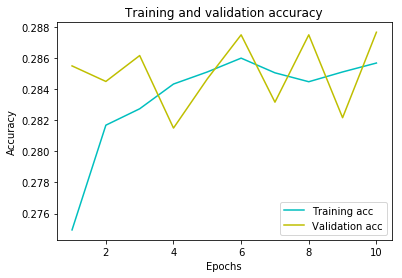

In [0]:
plot_acc_fn(history_init)

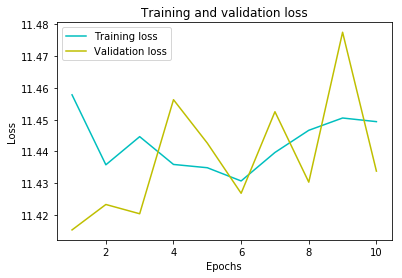

In [0]:
plot_loss_fn(history_init)

โมเดลทำการเรียนรู้และทำ back propagation แล้วแต่ weight ไม่ถูกอัพเดตเป็นค่าอื่น ทำให้ได้ผลลัพธ์เท่าเดิม ไม่ดีขึ้น ทำให้เราควรจะกำหนด weight เป็น random